In [47]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [48]:
df=pd.read_csv('wine.csv')
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [49]:
df.shape

(178, 14)

In [50]:
df.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [51]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [52]:
df.tail()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [53]:
df.dtypes

Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

In [54]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [55]:
#missing data
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

Wine                       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Alcohol                 AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Malic.acid              AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Ash                     AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Acl                     AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Mg                      AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Phenols                 AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Flavanoids                    AxesSubplot(0.125,0.125;0.0945122x0.343182)
Nonflavanoid.phenols       AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Proanth                    AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Color.int                  AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Hue                        AxesSubplot(0.578659,0.125;0.0945122x0.343182)
OD                         AxesSubplot(0.692073,0.125;0.0945122x0.343182)
Proline                    AxesSubplot

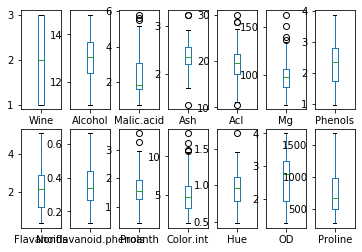

In [56]:
df.plot(kind='box',subplots=True, layout=(2,7))

In [57]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Wine                      2.0000
Alcohol                   1.3150
Malic.acid                1.4800
Ash                       0.3475
Acl                       4.3000
Mg                       19.0000
Phenols                   1.0575
Flavanoids                1.6700
Nonflavanoid.phenols      0.1675
Proanth                   0.7000
Color.int                 2.9800
Hue                       0.3375
OD                        1.2325
Proline                 484.5000
dtype: float64


In [58]:
#removing outlier
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z
df_wine = df[(z < 3).all(axis=1)]
df_wine


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [59]:
df.corr()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic.acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid.phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [60]:
df_wine.shape

(168, 14)

In [61]:
df.shape

(178, 14)

In [62]:
y= df_wine.iloc[:,0].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [63]:
y.shape

(168,)

In [64]:
y=y.reshape(-1,1)

In [65]:
y.shape

(168, 1)

In [66]:
x= df_wine.iloc[:,1:].values
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [67]:
x.shape

(168, 13)

In [68]:
mnb=MultinomialNB()

In [69]:
#max_a_scr=0
#for r_state in range(42,101):
    #x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
#mnb=MultinomialNB()
#mnb.fit(x_train,y_train)
#predmnb=mnb.predict(x_test)
#a_score=accuracy_score(predmnb,y_test)
#if a_scr>max_a_scr:
    #max_a_scr=a_scr
    #final_r_state=r_state
#print(final_r_state)
#print(max_a_scr)


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [71]:
mnb=MultinomialNB()

In [72]:
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [73]:
predmnb=mnb.predict(x_test)

In [74]:
print(accuracy_score(y_test,predmnb))

0.9411764705882353


In [75]:
print(confusion_matrix(y_test,predmnb))

[[14  1  0]
 [ 0 12  0]
 [ 0  1  6]]


In [76]:
print(classification_report(y_test,predmnb))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.86      1.00      0.92        12
           3       1.00      0.86      0.92         7

    accuracy                           0.94        34
   macro avg       0.95      0.93      0.94        34
weighted avg       0.95      0.94      0.94        34



In [77]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [78]:
predsvc=svc.predict(x_test)

In [79]:
print(accuracy_score(y_test,predsvc))

0.4117647058823529


In [80]:
print(confusion_matrix(y_test,predsvc))

[[ 1 14  0]
 [ 0 12  0]
 [ 0  6  1]]


In [81]:
print(classification_report(y_test,predsvc))

              precision    recall  f1-score   support

           1       1.00      0.07      0.12        15
           2       0.38      1.00      0.55        12
           3       1.00      0.14      0.25         7

    accuracy                           0.41        34
   macro avg       0.79      0.40      0.31        34
weighted avg       0.78      0.41      0.30        34



In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

In [84]:
predknn

array([2, 1, 2, 1, 2, 2, 1, 1, 2, 3, 1, 3, 3, 1, 2, 3, 3, 2, 2, 2, 3, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 1, 2])

In [85]:
print(accuracy_score(y_test,predknn))

0.7058823529411765


In [86]:
print(confusion_matrix(y_test,predknn))

[[12  0  3]
 [ 0 10  2]
 [ 2  3  2]]


In [87]:
print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

           1       0.86      0.80      0.83        15
           2       0.77      0.83      0.80        12
           3       0.29      0.29      0.29         7

    accuracy                           0.71        34
   macro avg       0.64      0.64      0.64        34
weighted avg       0.71      0.71      0.71        34



In [88]:
from sklearn.externals import joblib
joblib.dump(mnb,'lg_wine.pkl')

['lg_wine.pkl']